In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

ImportError: DLL load failed: Kan opgegeven procedure niet vinden.

# Input values

In [2]:
C = 1000                                     #
ib = 0                                      #1/m
g = 10                                          #m/s^2
cf = (g/C**2) 
L = 10000                                     #m                  #length of space domain
teind = 7 * 24 * 3600                          #sec                #length of time domain

M = 40                                         #[-]                #space resolution
N = 40000                                       #[-]                #time resolution

bump = np.zeros(100)
for i in range (len(bump)):
    if i> M*.1 and i<0.2*M:
        bump[i] = 10
    if i> M*.7 and i<0.8*M:
        bump[i] = -10
    else:
        None

d = 10+0*np.arange(M)                                         #m                  # bottom level
#d = 10 - ib*L/M*np.arange(M)  

u0= 0                                        #m/s                #flow velocity upstream
Z0 =  0*np.arange(M)
#Z0 = (cf/g*(u0**2)/ib) + ib*L/M*np.arange(M)    #m                  #Inital waterlevel (eqilibrium depth)

A = 1                                          #meter              #amplitude of tidal wave
w = 2*np.pi/500                                    #rad/sec            # radial frequentie of tidal wave
ZBC = 0                                        # meter             #mean waterlevel downstream

# Analitics

In [3]:
dx = L/M
dt = teind/N
C = np.sqrt(g*np.max(d+Z0))*dt/dx

if C > 1:
    print("Unstable timestep, courrant number is:", C)
elif C > 0:
    print("stable timestep, courrant number is:", C)

#de = (cf/g*(u0**2)/ib)
#print('The eqilibrium depth is:',round(de),'meters')
#print('The halflength of the backwatercurve is:',round(.24*de/ib *(ZBC/de)**(4/3)),'meter')

stable timestep, courrant number is: 0.6048


# Grid definition

In [4]:
x = np.arange(0,L,dx)
t = np.arange(0,teind,dt)
D = np.zeros((2*N,2*M))

# Initial conditions

In [5]:
for i in range(round(M)):
    D[0,2*i] = Z0[i]
    D[2,2*i] = Z0[i]
    D[1,1+2*i] = u0

# Boundary conditions

In [6]:
uUS = u0 * np.ones(N)
ZDS = ZBC+A*np.cos(w*t)

for i in range(round(N)):
    D[2*i,0] = ZDS[i]
    D[1+2*i,2*(M-1)+1]= uUS[i]

# Numerical simulation

In [7]:
for n in range(1,round(N-1)):
    for m in range(0,round(M-1)):
        hp = 0.5*(d[m]+d[m+1]+D[2*n,2*m]+D[2*n,2*m+2])
        if D[2*n-1,2*m+1] > 0:
            A = D[2*n-1,2*m+1] *(D[2*n-1,2*m+1]-D[2*n-1,2*m-1])/dx
        else:
            A = D[2*n-1,2*m+1] *(D[2*n-1,2*m+3]-D[2*n-1,2*m+1])/dx
        
        D[2*n+1,2*m+1]=(D[2*n-1,2*m+1] - (dt*g/dx)*(D[2*n,2*m+2]-D[2*n,2*m]) - dt*A)/(1+dt*cf*np.abs(D[2*n-1,2*m+1])/hp) 
    for m in range(1,round(M-1)):
        hp = 0.5*(d[m]+d[m-1]+D[2*n,2*m]+D[2*n,2*m-2])
        hm = 0.5*(d[m]+d[m-1]+D[2*n,2*m]+D[2*n,2*m-2])
        
        D[2*n+2,2*m] = D[2*n,2*m] - (dt/dx)*(hp*D[2*n+1,2*m+1]-hm*D[2*n+1,2*m-1])

    m=M-1
    hp = 0.5*(d[m]+d[m]+D[2*n,2*m]+D[2*n,2*m])
    hm = 0.5*(d[m]+d[m-1]+D[2*n,2*m]+D[2*n,2*m-2])
    
    D[2*n+2,2*m] = D[2*n,2*m] - (dt/dx)*(hp*D[2*n+1,2*m+1]-hm*D[2*n+1,2*m-1])
    

In [8]:
#print(dt,dx)
#np.set_printoptions(precision=1,suppress=True)
#print(D)

# plotting

<IPython.core.display.Javascript object>


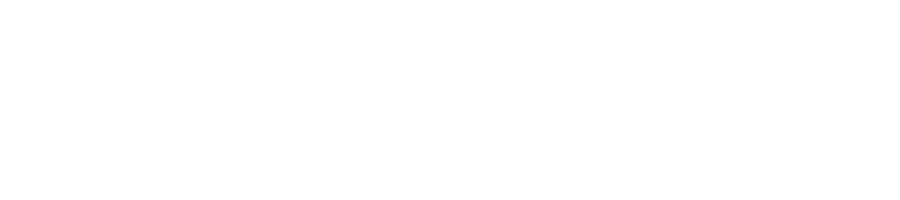

In [9]:
time  = teind*0.8               #sec
T = round(time/dt)

pZ = np.zeros(M)
pu = np.zeros(M)

for m in range(round(M)):
    pZ[m] = D[2*T,2*m]
    pu[m] = D[2*T+1,1+2*m]

    
fig = plt.figure(figsize=(9,2))
plt.plot(x,pZ,x,-d,x,pu,'r');

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

<IPython.core.display.Javascript object>


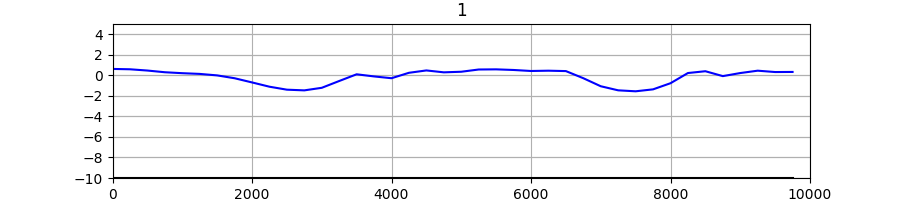

In [23]:
def update_line(i, line):
    t = i
    plt.title(round(t*dt/3600))
    for m in range(round(M)):
        pZ[m] = D[2*t,2*m]
    line.set_data([x], [pZ])

fig = plt.figure(figsize=(9,2))
ax = plt.subplot(111, xlim=(0,L), ylim=(-10, 5))
major_ticks = np.arange(-10, 5, 2)
minor_ticks = np.arange(-10, 5, 2)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.grid(which='both')

line, = plt.plot([], [], 'b')

plt.plot(x,-d , 'k')
plt.show()

animation.FuncAnimation(fig, update_line, fargs=[line], interval=dt*0.1)


<IPython.core.display.Javascript object>


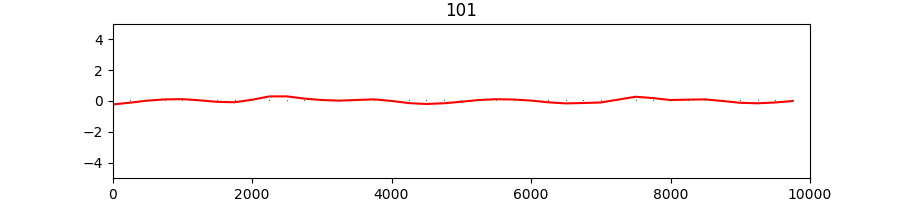

In [18]:
def update_line(i, line):
    t = i*2
    plt.title(round(t*dt/3600))
    for m in range(round(M)):
        pZ[m] = D[2*t+1,1+2*m]
    line.set_data([x], [pZ])

fig = plt.figure(figsize=(9,2))
ax = plt.subplot(111, xlim=(0,L), ylim=(u0-5, u0+5))
line, = plt.plot([], [], 'r')

plt.plot(x,u0*np.ones(len(x)), ',g')
plt.show()

animation.FuncAnimation(fig, update_line, fargs=[line], interval=dt*0.2)